<h2>Step 1: Loading The Dataset</h2>
<p>This is the step where we load our dataset using pandas, in this case we will load a dataset called Top Spotify Songs 2023</p>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

spotify_df = pd.read_csv('spotify-2023.csv', encoding='latin1')
#first 5 rows of the data
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<h2>Step 2: Explore Data</h2>

In [79]:
spotify_df.shape

(953, 24)

<h2>Step 3: EDA and Data Cleaning</h2>
<p>This is the step where we analyze the data to know if there are problems in it and solving these problems

</p>
<p>First thing I discovered is there are three columns released_year, released_month and released_day that isn't necessary to represent date in three column, so I decided to use these three columns to represent date in one column only</p>

In [80]:
#combine the columns into a single 'release_date' column
spotify_df['release_date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                    spotify_df['released_month'].astype(str) + '-' +
                                    spotify_df['released_day'].astype(str))

#drop the original year, month, and day columns
spotify_df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

In [81]:
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


<p>Another thing I discovered is there are columns that we are not gonna use or have benefit from them like the bpm (beats per minute), key and mode columns so we will drop them</p>

In [82]:
spotify_df.drop(columns=['bpm', 'key', 'mode'], inplace=True)

In [83]:
#the dataset after dropping the columns
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,0,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,0,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0,82,67,77,8,0,12,5,2022-10-20


In [84]:
#check if there are any duplicated rows
spotify_df.duplicated().sum()

0

In [85]:
#check for duplicates in the 'track_name' column
spotify_df[spotify_df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,0,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,0,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,24,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,0,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,24,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,1,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,0,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,9,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,353,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,40,66,24,58,17,0,19,5,1982-05-16


In [86]:
#convert 'streams' column to numeric format
# spotify_df['streams'] = pd.to_numeric(spotify_df['streams']) => this will result an error due to a weird value in row 574

In [87]:
# Drop the row that has this weird value that causes above error
spotify_df = spotify_df.drop([574])

In [88]:
#convert 'streams' column to numeric format after dropping that row
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'])

In [89]:
#sort the dataset by 'streams' in descending order
spotify_df.sort_values(by='streams', ascending=False)
spotify_df

#drop duplicates in 'track_name', keeping the first occurrence (highest streams)
spotify_df = spotify_df.drop_duplicates(subset='track_name', keep='first')


In [90]:
#check for duplicates in the 'track_name' column
spotify_df[spotify_df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date


In [91]:
spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  in_shazam_charts      892 non-null    object        
 11  danceability_%        942 non-null    int64         
 12  valence_%             942 non-null    int64         
 13  energy_%              942

In [92]:
spotify_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
release_date             0
dtype: int64

In [93]:
#dropping 'in_shazam_charts' column
spotify_df.drop(columns = ['in_shazam_charts'], inplace = True)


In [94]:
spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 952
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        942

In [95]:
#remove commas from 'in_shazam_charts' column due to the above error
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].str.replace(',', '')

#convert 'in_shazam_charts' column to numeric
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'])

spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 952
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    int64         
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        942

In [96]:
spotify_df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists              int64
in_deezer_charts                 int64
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
release_date            datetime64[ns]
dtype: object

In [97]:
spotify_df


,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,82,67,77,8,0,12,5,2022-10-20


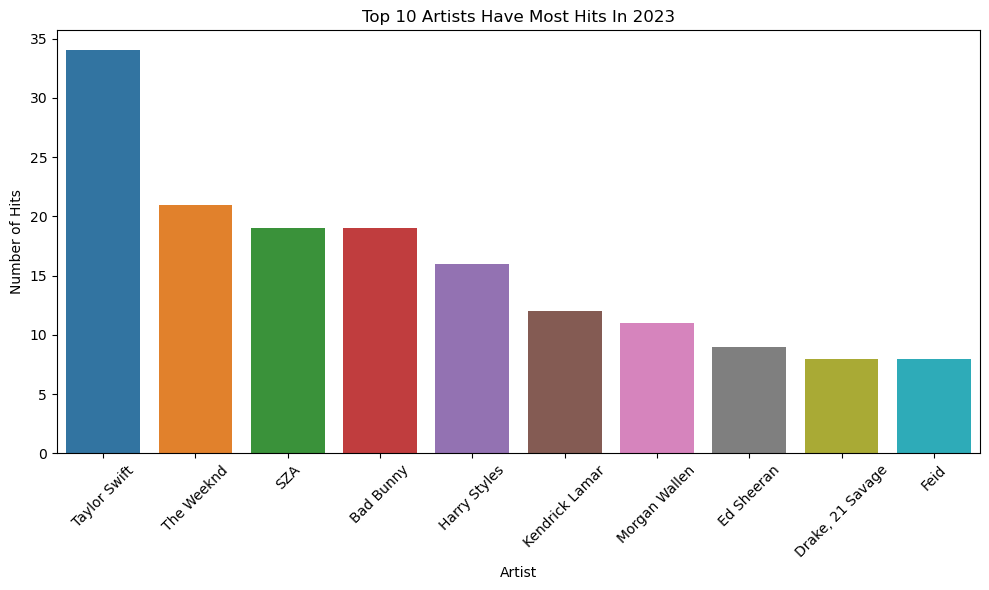

In [98]:
#count the number of songs released by each artist
artist_counts = spotify_df['artist(s)_name'].value_counts()

#select the top 10 artists
top_artists = artist_counts.head(10)

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values)

plt.title('Top 10 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

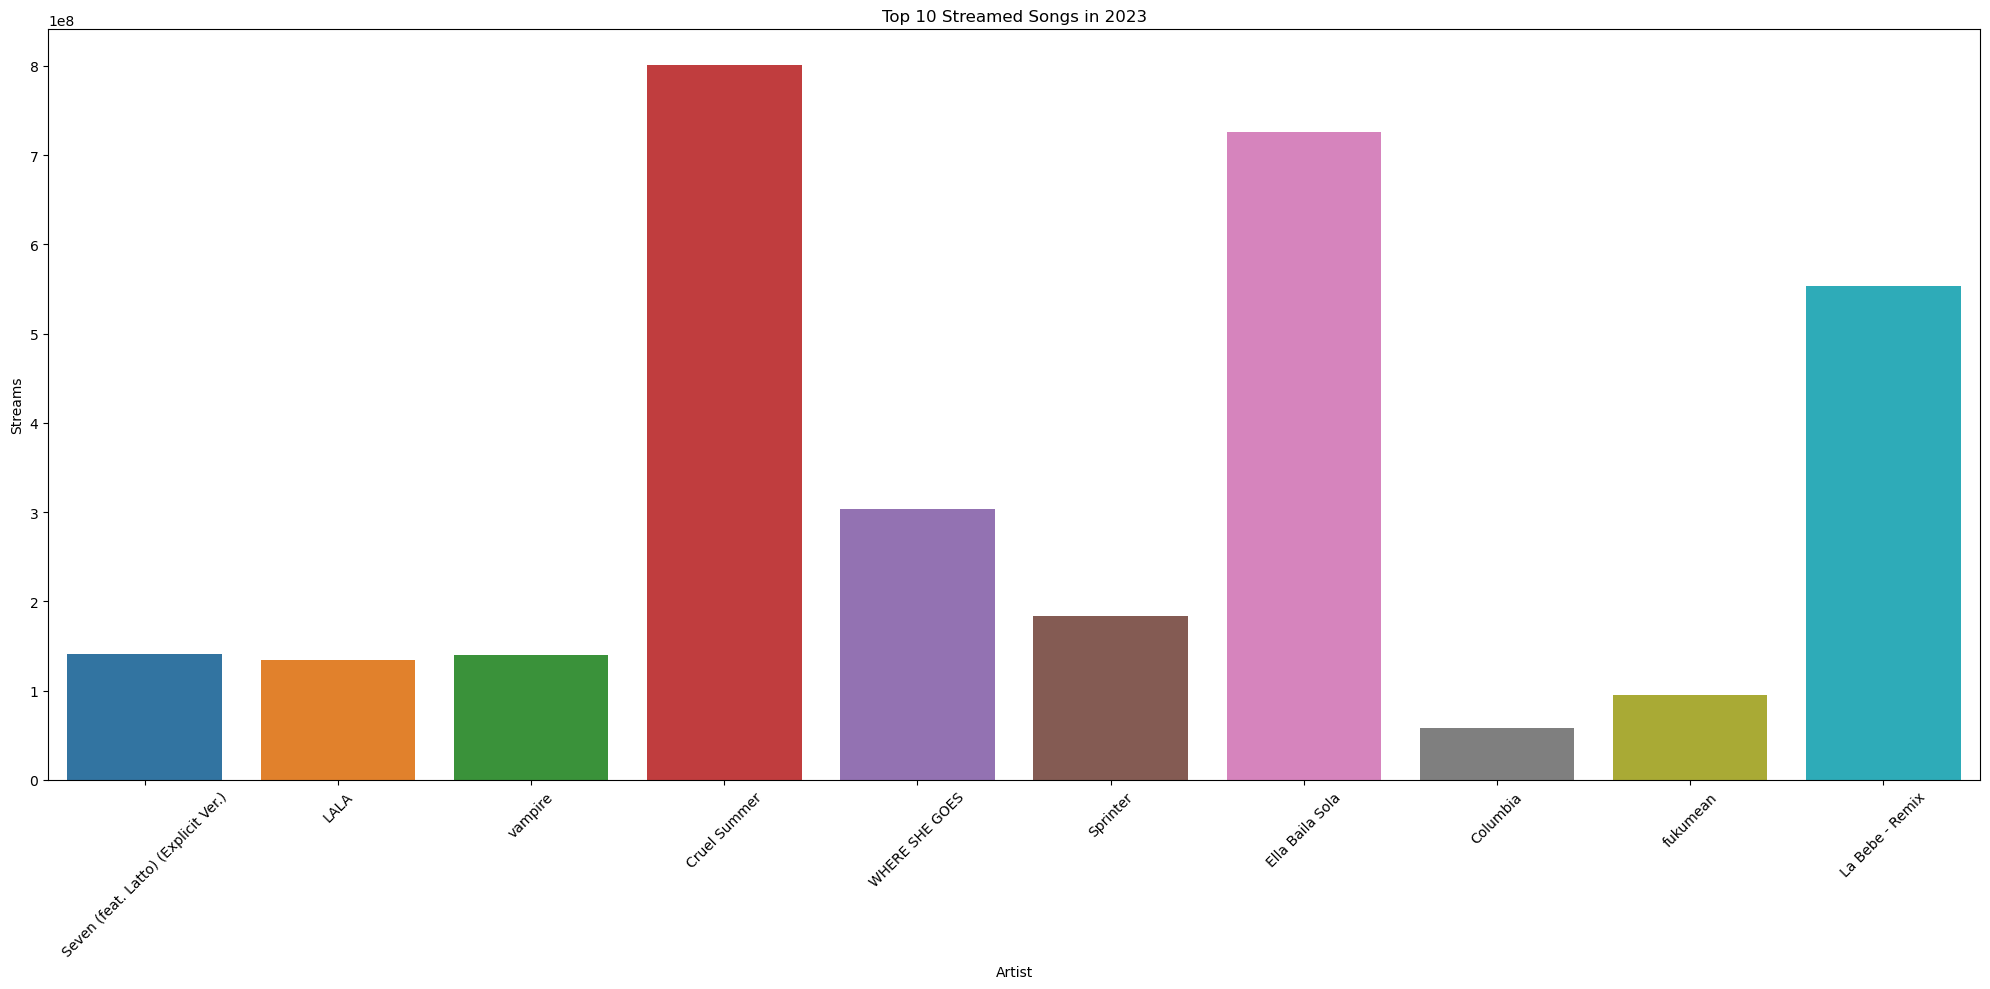

In [100]:
#the barplot represents Top 10 Streamed Songs in 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = spotify_df.track_name[:10], y = spotify_df.streams)

plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [103]:
top_10_most_streamed_songs = spotify_df.head(10)
top_10_most_streamed_songs

spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'release_date'],
      dtype='object')

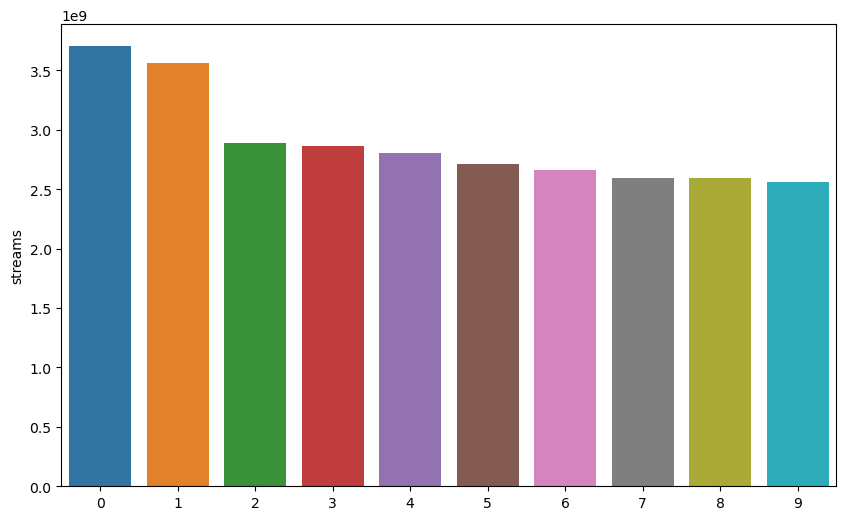

In [111]:
# Top 10 Most Streamed song.
top_10_most_streamed_songs = spotify_df.sort_values(by='streams', ascending=False).head(10)
top_10_most_streamed_songs.reset_index(inplace=True)
top_10_most_streamed_songs

#the barplot represents Top 10 Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_10_most_streamed_songs.index, y = top_10_most_streamed_songs.streams)
plt.show()

In [112]:
# Top 100 Most Streams song.
top_100_streams_song = spotify_df.sort_values(by='streams', ascending=False).head(100)
top_100_streams_song.reset_index(inplace=True)
top_100_streams_song

,index,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,3421,20,50,38,80,0,0,9,7,2019-11-29
1,179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,6808,7,83,93,65,58,0,9,8,2017-01-06
2,86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,1800,0,50,45,41,75,0,11,3,2018-11-08
3,620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,3595,6,82,54,59,69,0,18,10,2019-05-10
4,41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,76,91,50,54,0,7,5,2018-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,274,Shivers,Ed Sheeran,1,10147,30,1302184087,234,71,543,18,79,82,86,28,0,4,9,2021-09-09
96,401,Heather,Conan Gray,1,6170,7,1301799902,82,1,231,0,47,25,43,62,0,32,3,2020-03-20
97,22,I Wanna Be Yours,Arctic Monkeys,1,12859,110,1297026226,24,98,582,2,48,44,42,12,2,11,3,2013-01-01
98,820,Iris,The Goo Goo Dolls,1,13101,9,1284942608,137,5,582,0,32,49,72,0,0,9,4,1998-03-31


In [117]:
# Get top 10 most streamed artist name.

top_10_most_streamed_artist = top_10_most_streamed_songs['artist(s)_name'].head(10)
top_10_most_streamed_artist



0                      The Weeknd
1                      Ed Sheeran
2                   Lewis Capaldi
3                     Tones and I
4           Post Malone, Swae Lee
5             Drake, WizKid, Kyla
6    Justin Bieber, The Kid Laroi
7                 Imagine Dragons
8        The Chainsmokers, Halsey
9           The Weeknd, Daft Punk
Name: artist(s)_name, dtype: object

In [140]:
top_10_most_streamed_artist_in_top_100_songs = top_10_most_streamed_artist.value_counts().head(10)
top_10_most_streamed_artist_in_top_100_songs.index



Index(['The Weeknd', 'Ed Sheeran', 'Lewis Capaldi', 'Tones and I',
       'Post Malone, Swae Lee', 'Drake, WizKid, Kyla',
       'Justin Bieber, The Kid Laroi', 'Imagine Dragons',
       'The Chainsmokers, Halsey', 'The Weeknd, Daft Punk'],
      dtype='object', name='artist(s)_name')

In [148]:
# specific_artists = [
#     "The Weeknd", "Ed Sheeran", "Lewis Capaldi", "Tones and I",
#     "Post Malone, Swae Lee", "Drake, WizKid, Kyla", "Justin Bieber, The Kid Laroi",
#     "Imagine Dragons", "The Chainsmokers, Halsey", "The Weeknd, Daft Punk"
# ]

filtered_artists = top_100_streams_song[top_100_streams_song['artist(s)_name'].isin(top_10_most_streamed_artist_in_top_100_songs.index)]
filtered_artists

artist_song_counts = filtered_artists['artist(s)_name'].value_counts()
artist_song_counts

SyntaxError: unexpected character after line continuation character (2886890699.py, line 7)

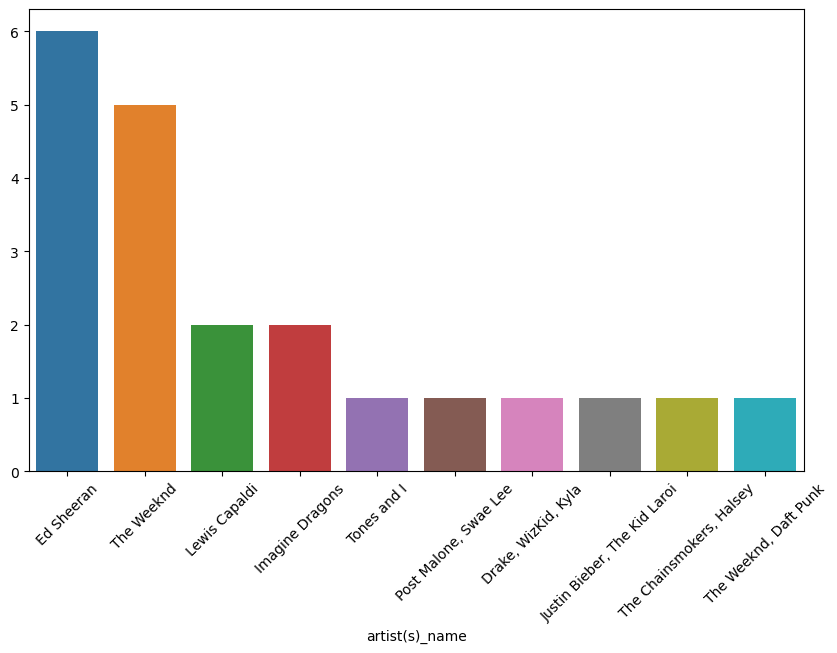

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(x=artist_song_counts.index, y=artist_song_counts.values)
plt.show()